# Trabajo práctico 1 - Regresión Lineal.

In [259]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt

## Generación de muestras

In [260]:
# FUNCIONES

#Función ReLU: es 0 para X<=0 y cumple y=x para X>0 
def relu(x) : 
    return np.where(x>0, x, 0)
    

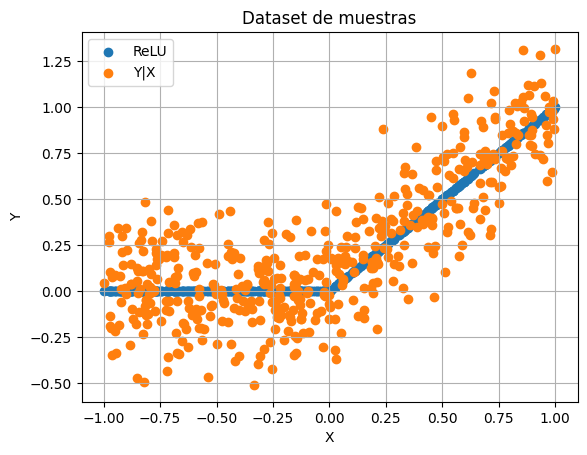

In [261]:
#Se genera el dataset
N=500
a = -1
b = 1
sigma = np.sqrt(0.04)

x =np.random.uniform(a,b,N) 
r = relu(x)
y_x = np.random.normal(r,sigma,N)

#Se grafican los datos
plt.scatter(x,r, label = 'ReLU')
plt.scatter(x,y_x, label = 'Y|X')
plt.title('Dataset de muestras')
#plt.xlim(-1,1)
#plt.ylim(-0.7,1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()


## Regresión Lineal

##### Implementación de la clase

In [262]:
# ---------------- Métodos a utilizar en la clase RegLineal

def fit_matrix(X,y) :
    #Se calcula la solución óptima para la estimación de y utilizando x
    w=np.linalg.inv(np.transpose(X)@ X) @ np.transpose(X)@y
    return w

def fit_gradient(X,y, learning_rate, seed, iterations) :
    theta= seed 
    n = X.shape[0]

    w_hist = np.zeros(iterations) #Se crea un array de ceros para almacenar los costos
        
    for i in range (iterations):
        grad_j = ((2/n) * np.transpose(X)) @ (X @ theta -y)
        theta = theta - learning_rate * grad_j

        w_hist[i] = theta[1] #Se guardan en el array
            
    return theta, w_hist

# ---------------- Construcción de la clase
class RegLineal:

    def __init__(self) -> None:
        self.params = None #Se crea el campo para cargar los parámetros del modelo
        
    # Etapa de entrenamiento: Se colocan valores para learning_rate, seed e iterations, con el fin de que no las pida para el método de matrices 
    def fit (self, X, y, method, learning_rate=0.01, seed=[0,0], iterations=1000):

        if  method == 'matrix':
            w= fit_matrix(X,y) #Se implementa el método matricial
            self.params = { #Se cargan los parámetros como un diccionario
                'w' : w[1],
                'b' : w[0]
            }

        elif method == 'gradient':
            w, w_hist =fit_gradient(X, y, learning_rate, seed, iterations)
            self.params = { #Se cargan los parámetros como un diccionario
                'w' : w[1],
                'b' : w[0],
                'w_hist' : w_hist
            }
        else:
            raise ValueError('Este método no está implementado')

        return self

    # Etapa de testeo
    def predict(self,X):
        #Validación: Se lanza una excepción si el modelo no fue entrenado previamente
        if self.params is None:
            raise ValueError ('Se debe entrenar al modelo primero, utilizando fit().')
        else:
            #Se retorna la función de regresión: y_hat = x*w + b
            return self.params['b'] + self.params['w'] * X[:,1]

    # Cómputo del error (error cuadrático medio)
    def err_predict(self,X,y):
        #retorna el error cuadrático medio, usando los datos teóricos 'y' y la predicción previa
        return np.mean((y-self.predict(X))**2)


##### Comparaciones y testeos

Error de predicción:  0.061453889917601284
Potencia irradiada para irradiancia 0.5: 0.5016887927898711


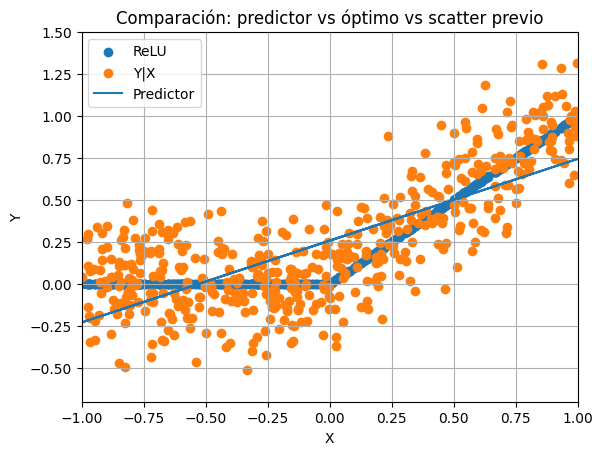

In [263]:
#Se declara el modelo
model = RegLineal()

#Se crea el vector X, para poder implementar esta solución:
#X = [columna de 1s de longitud n , columna de x1 hasta xn] --> X tiene tamaño nx2 (n=500 en este caso)
X= np.c_[np.ones(x.shape[0]),x]

#Se entrena el modelo, utilizando el dataset generado previamente
model.fit(X,y_x, method = 'matrix')

#Se busca el error de entrenamiento (error cuadrático medio)
err = model.err_predict(X,y_x)
print('Error de predicción: ', err)

#Se utiliza el regresor para predecir la potencia irradiada para una irradiancia de 0.5
irr = 0.5
y_ev = model.predict(np.array([[1,irr]]))
print('Potencia irradiada para irradiancia 0.5:',y_ev[0])

#Se calcula el regresor para todas las muestras de x
y = model.predict(X)

#Se grafica el regresor obtenido superpuesto al óptimo y al scatter
plt.scatter(x,r, label = 'ReLU')
plt.scatter(x,y_x, label = 'Y|X')
plt.plot(x,y, label = 'Predictor')
plt.legend()
plt.title('Comparación: predictor vs óptimo vs scatter previo')
plt.xlim(-1,1)
plt.ylim(-0.7,1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()


## Gradiente descendiente

Error de predicción:  0.061454052319032865
Potencia irradiada para irradiancia 0.5: 0.5020980386482935


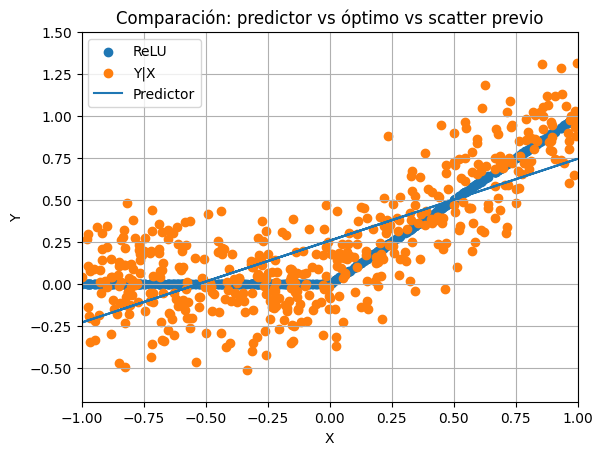

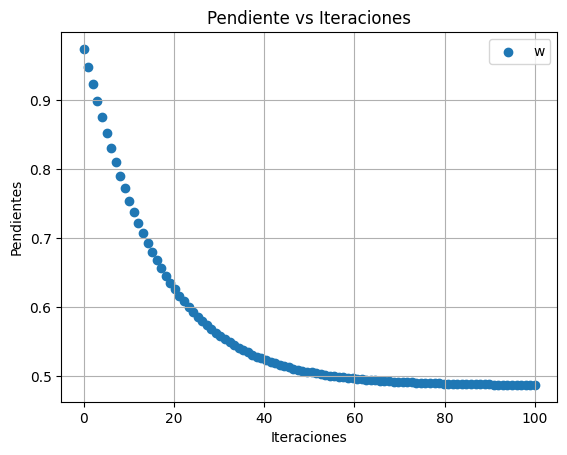

In [264]:
#Se declara el modelo
model = RegLineal()

#Se crea el vector X, para poder implementar esta solución:
#X = [columna de 1s de longitud n , columna de x1 hasta xn] --> X tiene tamaño nx2 (n=500 en este caso)
X= np.c_[np.ones(x.shape[0]),x]

#Normalización de los valores

n_it = 100

#Se entrena el modelo, utilizando el dataset generado previamente, y colocando valores para el learning_rate y la semilla inicial, junto a la cantidad de iteraciones
model.fit(X,y_x, method = 'gradient', learning_rate = 0.1, seed = [1,1], iterations = n_it)

#Se busca el error de entrenamiento (error cuadrático medio)
err = model.err_predict(X,y_x)
print('Error de predicción: ', err)

#Se utiliza el regresor para predecir la potencia irradiada para una irradiancia de 0.5
irr = 0.5
y_ev = model.predict(np.array([[1,irr]]))
print('Potencia irradiada para irradiancia 0.5:',y_ev[0])

#Se calcula el regresor para todas las muestras de x
y = model.predict(X)

#Se grafica el regresor obtenido superpuesto al óptimo y al scatter
plt.scatter(x,r, label = 'ReLU')
plt.scatter(x,y_x, label = 'Y|X')
plt.plot(x,y, label = 'Predictor')
plt.legend()
plt.title('Comparación: predictor vs óptimo vs scatter previo')
plt.xlim(-1,1)
plt.ylim(-0.7,1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

#Se grafica la pendiente en función de la cantidad de iteraciones
w_hist = model.params['w_hist']
n = np.linspace(0,n_it,n_it)

plt.figure()
plt.scatter(n,w_hist, label = 'w')
plt.title('Pendiente vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Pendientes')
plt.legend()
plt.grid()

## Complementario

In [265]:
#Se genera el dataset
N=500
a = -1
b = 1
sigma = np.sqrt(0.04)

x =np.random.uniform(a,b,N) 
r = relu(x)
y_x = np.random.normal(r,sigma,N)

In [266]:
# ---------------- Métodos a utilizar en la clase RegCuadratica

def fit_matrix(X,y) :
    #Se calcula la solución óptima para la estimación de y utilizando x
    w=np.linalg.inv(np.transpose(X)@ X) @ np.transpose(X)@y
    return w

def fit_gradient(X,y, learning_rate, seed, iterations) :
    theta= seed 
    n = X.shape[0]

    w_hist = np.zeros(iterations) #Se crea un array de ceros para almacenar los costos
        
    for i in range (iterations):
        grad_j = ((2/n) * np.transpose(X)) @ (X @ theta -y)
        theta = theta - learning_rate * grad_j

        w_hist[i] = theta[1] #Se guardan en el array
            
    return theta, w_hist

# ---------------- Construcción de la clase
class RegCuadratica:

    def __init__(self) -> None:
        self.params = None #Se crea el campo para cargar los parámetros del modelo
        
    # Etapa de entrenamiento: Se colocan valores para learning_rate, seed e iterations, con el fin de que no las pida para el método de matrices 
    def fit (self, X, y, method, learning_rate=0.01, seed=[0,0], iterations=1000):

        if  method == 'matrix':
            w= fit_matrix(X,y) #Se implementa el método matricial
            self.params = { #Se cargan los parámetros como un diccionario
                'w' : w[1],
                'b' : w[0],
                'a' : w[2]
            }

        elif method == 'gradient':
            w, w_hist =fit_gradient(X, y, learning_rate, seed, iterations)
            self.params = { #Se cargan los parámetros como un diccionario
                'w' : w[1],
                'b' : w[0],
                'a' : w[2],
                'w_hist' : w_hist
            }
        else:
            raise ValueError('Este método no está implementado')

        return self

    # Etapa de testeo
    def predict(self,X):
        #Validación: Se lanza una excepción si el modelo no fue entrenado previamente
        if self.params is None:
            raise ValueError ('Se debe entrenar al modelo primero, utilizando fit().')
        else:
            #Se retorna la función de regresión: y_hat = x*w + b
            return self.params['b'] + self.params['w'] * X[:,1] + self.params ['a'] * X[:,2]

    # Cómputo del error (error cuadrático medio)
    def err_predict(self,X,y):
        #retorna el error cuadrático medio, usando los datos teóricos 'y' y la predicción previa
        return np.mean((y-self.predict(X))**2)


Error de predicción para la regresión cuadrática:  0.041291143728589864
Error de predicción para la regresión lineal:  0.05799210288401319
Potencia irradiada para irradiancia 0.5: 0.5156521281828359


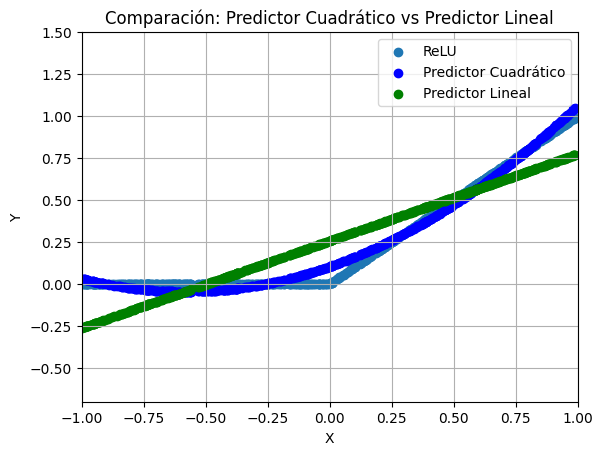

In [267]:
# ----------------------------------- Regresión Cuadrática
#Se declara el modelo
model_C = RegCuadratica()

#Se crea el vector X, para poder implementar esta solución:
#X = [columna de 1s de longitud n , columna de x1 hasta xn] --> X tiene tamaño nx2 (n=500 en este caso)
X_C= np.c_[np.ones(x.shape[0]),x,x**2]

#Se entrena el modelo, utilizando el dataset generado previamente
model_C.fit(X_C,y_x, method = 'matrix')

#Se busca el error de entrenamiento (error cuadrático medio)
err_C = model_C.err_predict(X_C,y_x)
print('Error de predicción para la regresión cuadrática: ', err_C)

#Se calcula el regresor para todas las muestras de x
y_C = model_C.predict(X_C)



# ----------------------------------- Regresión Lineal

#Se declara el modelo
model = RegLineal()

#Se crea el vector X, para poder implementar esta solución:
#X = [columna de 1s de longitud n , columna de x1 hasta xn] --> X tiene tamaño nx2 (n=500 en este caso)
X= np.c_[np.ones(x.shape[0]),x]

#Normalización de los valores

n_it = 100

#Se entrena el modelo, utilizando el dataset generado previamente, y colocando valores para el learning_rate y la semilla inicial, junto a la cantidad de iteraciones
model.fit(X,y_x, method = 'gradient', learning_rate = 0.1, seed = [1,1], iterations = n_it)

#Se busca el error de entrenamiento (error cuadrático medio)
err = model.err_predict(X,y_x)
print('Error de predicción para la regresión lineal: ', err)

#Se utiliza el regresor para predecir la potencia irradiada para una irradiancia de 0.5
irr = 0.5
y_ev = model.predict(np.array([[1,irr]]))
print('Potencia irradiada para irradiancia 0.5:',y_ev[0])

#Se calcula el regresor para todas las muestras de x
y = model.predict(X)


#Se grafica el regresor obtenido superpuesto al óptimo y al scatter
plt.scatter(x,r, label = 'ReLU')
#plt.scatter(x,y_x, label = 'Y|X')
plt.scatter(x,y_C, label = 'Predictor Cuadrático', color = 'blue')
plt.scatter(x,y, label = 'Predictor Lineal', color = 'green')
plt.legend()
plt.title('Comparación: Predictor Cuadrático vs Predictor Lineal')
plt.xlim(-1,1)
plt.ylim(-0.7,1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()


# Desarrollos teóricos

# INCISO A

## Parámetros de la variable X

Dado que X posee distribución uniforme: $X \sim U(-1,1)$


$E[X] = \frac{b+a}{2} = \frac{1-1}{2} = 0$

$Var[X] = \frac{(b-a)^2}{12} = \frac{2^2}{12} = \frac{1}{3}$

## Parámetros de la variable Y

Para la esperanza de Y, se tiene que:

$Y|X_{=x} \sim \mathcal{N}(r(x),\sigma^2)$ y además:  $r(x)=x\cdot\mathbf{1}\{x>0\}$

Se tiene que, la esperanza de Y, vale:

$E[Y]=E[E[Y|X]]=E[r(x)]=\int r(x)\cdot f(x)\cdot dx = \int_{0}^{1} \frac{x}{2} \cdot dx = \frac{1}{4}$

Por otro lado, la varianza de la variable Y:

$var[Y] = E[var[Y|X]] + var[E[Y|X]] = E[\sigma^2] + var[r(x)]$

Donde, se tiene que : $E[\sigma^2]=0.04$

Y además: $var[r(x)] = E[r(x)^2] - E[r(x)]^2 = \int_{0}^{1} \cdot \frac{x^2}{2} \cdot dx + \frac{1}{4^2} = \frac{1}{6} - \frac{1}{16} = \frac{5}{48} $

Por lo que la varianza de Y resulta: $var[Y] = \frac{173}{1200}$

## Esperanza de XY

$E[XY]=E[E[Y|X]\cdot X] = E[r(x)\cdot X] = \int_{0}^{1} \frac{X^2}{2}\cdot dx = \frac{1}{6}$

# INCISO B

### Función de regresión óptima

##### En este caso: $\varphi(x) = E[Y|X_{=x}]$ es la función de regresión óptima

Y el error Bayesiano asociado, es:

$E[var[Y|X]]$ = $\sigma^2$ = 0.04

# INCISO C

### Mejor predictor sin observar X y comparar el error esperado en comparación del regresor óptimo

Si no se observa X, el mejor predictor de Y es aquel que minimice el Error Cuadrático: 
$E[Y]$

En este caso, el error esperado del mismo predictor, es: 

$MSE = E[(Y - E[Y])^2] = var[Y] = \frac{173}{1200} = 0.144$

Por otro lado, utilizando el regresor óptimo, se tiene que:

$MSE = E[(Y - \varphi(x))^2]= E[var[Y|X] = 0.04$

El MSE del regresor óptimo es por definición el Error Bayesiano. En este caso, se evidencia que utilizar el regresor óptimo para estimar Y es mejor que utilizar la esperanza de Y como estimador.

Es más preciso realizar una estimación de Y conociendo datos de X que estimar Y a partir de datos de Y utilizando la media